# Unit 5 | Assignment - The Power of Plots 

The ride sharing company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
City_data = pd.read_csv(city_data_to_load)
Ride_data = pd.read_csv(ride_data_to_load)

### Combine the data into a single dataset and  Display the data table for preview

In [2]:
combine_city_ride = pd.merge(City_data, Ride_data, on=["city","city"], how="left")
# Display the columns in certain way 
combine_city_ride = combine_city_ride[["city","date","fare","ride_id","driver_count","type"]]

combine_city_ride.head(10)

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban
5,Richardfort,2018-04-21 03:44:04,9.54,3698147103219,38,Urban
6,Richardfort,2018-02-03 00:14:26,29.04,4982665519010,38,Urban
7,Richardfort,2018-02-08 15:50:12,16.55,2270463070874,38,Urban
8,Richardfort,2018-04-03 15:07:34,40.77,9496210735824,38,Urban
9,Richardfort,2018-02-19 14:09:20,27.11,8690324801449,38,Urban


## Build a Bubble Plot:

Plot showcases the relationship between four key variables:
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In [3]:
# Obtain the x and y coordinates for each of the three city types
def Cal_fare_ride_drivers(Type_data):
    read_data = combine_city_ride.loc[combine_city_ride['type'] == Type_data].groupby(
        'city')
    AveFare = read_data['fare'].mean()
    Number_rides = read_data['ride_id'].count()
    Number_drivers = read_data['driver_count'].first()
    # return the Average Fare,Number of rides amd Number of Drivers
    return AveFare, Number_rides, Number_drivers

In [4]:
# City Type (Urban, Suburban, Rural)
# Average Fare ($) Per City
Urban_average_fare = Cal_fare_ride_drivers('Urban')[0]
Suburban_average_fare = Cal_fare_ride_drivers('Suburban')[0]
Rural_average_fare = Cal_fare_ride_drivers('Rural')[0]

# Total Number of Rides Per City
Urban_number_rides = Cal_fare_ride_drivers('Urban')[1]
Suburban_number_rides = Cal_fare_ride_drivers('Suburban')[1]
Rural_number_rides = Cal_fare_ride_drivers('Rural')[1]

# Total Number of Drivers Per City
Urban_number_drivers = Cal_fare_ride_drivers('Urban')[2]
Suburban_number_drivers = Cal_fare_ride_drivers('Suburban')[2]
Rural_number_drivers = Cal_fare_ride_drivers('Rural')[2]

### Show the scatter plot for each city type and and save the plot in the file 

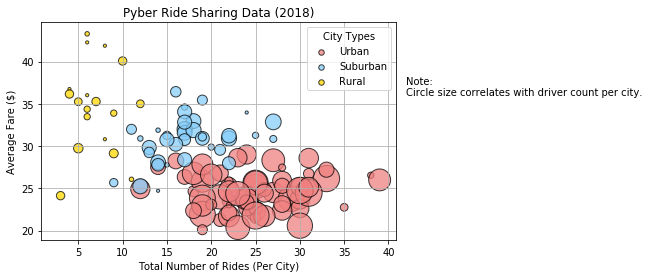

In [5]:
# Setup the figure
fig = plt.figure(figsize=(14, 4))
# set the plot in the first half of the the figure and keep second half for the text:Note
ax = fig.add_subplot(121)
# Build the scatter plots for each city types
ax.scatter(Urban_number_rides, Urban_average_fare, s=Urban_number_drivers*10,
           color='lightcoral', alpha=0.75, edgecolor='k', linewidth=1, label='Urban')
ax.scatter(Suburban_number_rides, Suburban_average_fare, s=Suburban_number_drivers*10,
           color='lightskyblue', alpha=0.75, edgecolor='k', linewidth=1, label='Suburban')
ax.scatter(Rural_number_rides, Rural_average_fare, s=Rural_number_drivers*10,
           color='gold', alpha=0.75, edgecolor='k', linewidth=1, label='Rural')

# Incorporate the other graph properties
ax.title.set_text('Pyber Ride Sharing Data (2018)')
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.grid()
# Create a legend and the size of the legend
lgnd = plt.legend(loc="upper right", numpoints=1,
                  fontsize=10, frameon=True, title="City Types")
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])
# Incorporate a text label regarding circle size
Note = "Note:\nCircle size correlates with driver count per city."
plt.text(42, 36, Note, fontsize=10)
# Show plot
plt.show()
# Save Figure
fig.savefig("Results/Pyber_ride_bubble_plot.png")


## Build the following three pie charts :

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

*  Use the defination 'Build_pie_chart' to build the pie chart, 
    2 arrguments as input : label and sizes
     


In [6]:
def Build_pie_chart(City_index, City_values):
    # Labels for the sections of 'Total Fare by city' pie chart
    labels = City_index
    # The values of each section of 'Total Fare by city' pie chart
    sizes = City_values
    # The colors of each section of the pie chart
    colors = ["gold", "lightskyblue", "lightcoral"]
    # Tells matplotlib to seperate the "Urban" section from the others
    explode = (0, 0, 0.1)
    # Creates the pie chart based upon the values above
    # Automatically finds the percentages of each part of the pie chart
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=140)

### Display the pie chart : % of Total Fares by City Type and save the chart in the file 


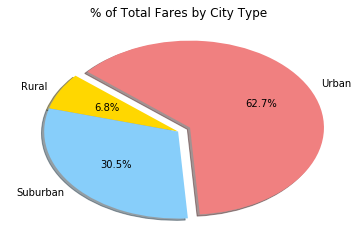

In [7]:
# The group by City type
City_type_gb = combine_city_ride.groupby('type')

# % of Total Fares by City Type
Fare_city_type = City_type_gb['fare'].sum()
# Call the defination to build the pie chart
Build_pie_chart(Fare_city_type.index, Fare_city_type.values)
# Assign the title fot the pie chart
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Results/Totalfare_citytype_piechart.png")
# Show Figure
plt.show()

### Display the pie chart : % of Total Rides by City Type and save the chart in the file 


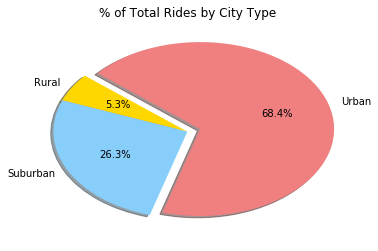

In [8]:
# Calculate Ride Percents
Ride_city_type = City_type_gb['ride_id'].count()
# Call the defination to build the pie chart
Build_pie_chart(Ride_city_type.index, Ride_city_type.values)
# Assign the title fot the pie chart
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Results/Totalrides_citytype_piechart.png")
# Show Figure
plt.show()

### Display the pie chart : % of Total Drivers by City Type and save the chart in the file 


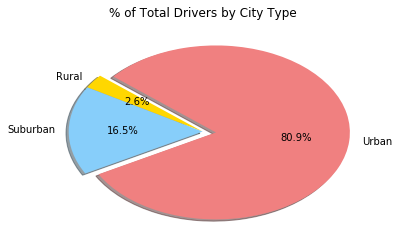

In [9]:
# Calculate Driver Percents
# Get the index of the groupby dataframe
City_and_type_gb = City_type_gb.count()
# calculate the drivers in all cities based on the city type
Rural_drivers = Rural_number_drivers.sum()
Suburban_drivers = Suburban_number_drivers.sum()
Urban_drivers = Urban_number_drivers.sum()

Driver_city_type = [Rural_drivers, Suburban_drivers, Urban_drivers]
# Call the defination to build the pie chart
Build_pie_chart(City_and_type_gb.index, Driver_city_type)
# Assign the title fot the pie chart
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("Results/Totaldrivers_citytype_piechart.png")
# Show Figure
plt.show()

## Description of three observable trends based on the data
#### *  Observation 1: 
Ride sharing companies are more popular in urban cities which means that there are more drivers and more rides in urban cities as compared to other city types. Because of the increase in rides, the average fare is also less. If we observe the pie chart, it is very clear that urban cities are ahead than other city types in terms of the percentage of ride, fare or driver count.
#### * Observation 2: 
Suburban cities are less popular than urban cities, but they are more popular than rural cities. They do have more drivers and number of rides as compared to rural cities. The average fare is also in the middle range.
#### * Observation 3: 
This service is not so good in rural cities, which means that the number of drivers and rides are less than any other city type. Also, the average fare is higher in this area as compared to other city types. The percentage off for number of rides is less than 7%. As a result, the number of drivers are less than 3%.

